## Plot CTD profiles against Bottle data

### Load libraries 

In [17]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import numpy as np
import seaborn as sns
sns.set_style("white")
import os

### Load CTD profiles from .cnv 

In [8]:
from seabird.cnv import fCNV
myCTD= 'C:/Users/malek/Downloads/notebooks_2021/DissolvedOxygen/data/cast043.cnv'
profile = fCNV(myCTD)
profile

In [9]:
# header of the cnv file
profile.attrs 

{'sbe_model': '9',
 'LATITUDE': 40.827666666666666,
 'LONGITUDE': 2.786,
 'gps_datetime': 'Mar 04 2022 20:00:27',
 'seasave': 'V 7.26.2.13',
 'instrument_type': 'CTD',
 'nquan': '46',
 'nvalues': '303',
 'start_time': 'Mar 04 2022 20:00:27 [NMEA time, header]',
 'bad_flag': '-9.990e-29',
 'file_type': 'ascii',
 'md5': '086159f4155aabddc09de3ff935b72d3',
 'datetime': datetime.datetime(2022, 3, 4, 20, 0, 27),
 'filename': 'cast043.cnv'}

In [10]:
# list of varible inside the .cnv file
profile.keys()

['scan',
 'PRES',
 'TEMP',
 'TEMP2',
 'T2-T190C',
 'CNDC',
 'CNDC2',
 'C2-C1S/m',
 'ph',
 'flECO-AFL',
 'turbWETntu0',
 'CStarAt0',
 'CStarTr0',
 'par',
 'oxygenvoltage',
 'v0',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v7',
 'nbf',
 'bpos',
 'pumps',
 'LATITUDE',
 'LONGITUDE',
 'timeS',
 'timeJ',
 'PSAL',
 'PSAL2',
 'secS-priS',
 'soundspeed',
 'sigma-�00',
 'sigma-�11',
 'D2-D1',
 'potemperature',
 'potemperature2',
 'tsa',
 'sbeox0PS',
 'sbeox0Mg/L',
 'oxygen_ml_L',
 'DEPTH',
 'descentrate',
 'nbin',
 'flag']

In [11]:
#extract my CTD variables
temp= profile['TEMP'] #Temperature
pres= profile['PRES'] #Pressure
sal= profile['PSAL'] #Salinity
oxy= profile['oxygen_ml_L'] #Oxygen
lon= profile.attrs['LONGITUDE']
lat= profile.attrs['LATITUDE']
#del(profile)

In [12]:
dfP = profile.as_DataFrame()
dfP.head()

,scan,PRES,TEMP,TEMP2,T2-T190C,CNDC,CNDC2,C2-C1S/m,ph,flECO-AFL,...,potemperature,potemperature2,tsa,sbeox0PS,sbeox0Mg/L,oxygen_ml_L,DEPTH,descentrate,nbin,flag
0,501.0,5.0,13.8180,13.8251,0.0071,4.521783,4.522591,0.000792,8.108,0.9301,...,13.8172,13.8243,-60.554,98.597,8.0487,5.6320,4.961,0.228,16.0,0.0
1,544.0,6.0,13.8118,13.8057,-0.0061,4.521471,4.520493,-0.000959,8.108,0.9228,...,13.8109,13.8048,-60.885,98.374,8.0314,5.6199,5.953,0.646,36.0,0.0
2,581.0,7.0,13.7577,13.7583,0.0005,4.515952,4.515686,-0.000267,8.109,0.9241,...,13.7567,13.7572,-62.068,97.830,7.9957,5.5949,6.946,0.556,44.0,0.0
3,636.0,8.0,13.7194,13.7220,0.0026,4.511754,4.511758,-0.000001,8.109,0.9459,...,13.7182,13.7208,-62.701,97.900,8.0076,5.6033,7.938,0.417,57.0,0.0
4,683.0,9.0,13.6931,13.6929,-0.0001,4.508945,4.508666,-0.000276,8.109,0.9598,...,13.6917,13.6916,-63.172,97.783,8.0024,5.5996,8.930,0.607,40.0,0.0


### laod bottle data from .ros file

In [13]:
#Load btl.ros files
from ctd import rosette_summary
ros = rosette_summary('C:/Users/malek/Downloads/notebooks_2021/DissolvedOxygen/data/cast 043_040322.ros')
ros = ros.groupby(ros.index).mean()
ros

,sal00,t090C,sbeox0Mg/L,sbeox0ML/L,oxsolML/L,sbeox0V,sigma-�00,depSM,scan,flag,pressure
nbf,,,,,,,,,,,
1,38.653419,13.798240,5.235092,3.663210,5.700533,1.775888,29.067177,300.950187,11637.5,False,303.519604
2,38.653357,13.798571,5.236445,3.664145,5.700499,1.776861,29.067037,300.070735,11686.0,False,302.631878
3,38.619135,13.815920,5.424422,3.795682,5.699724,1.839204,29.032857,178.578735,14662.0,False,180.049551
4,38.608559,13.789186,5.561151,3.891369,5.703162,1.865794,29.030222,173.023633,14787.0,False,174.446265
5,38.532004,13.617664,6.133955,4.292172,5.725614,2.011655,29.006202,129.596319,15750.0,False,130.648149
6,38.529253,13.609388,6.134794,4.292763,5.726667,2.013994,29.005767,127.133204,15798.0,False,128.164327
7,38.498516,13.681202,6.115670,4.279386,5.719479,2.044355,28.965082,78.823341,16900.5,False,79.453295
8,38.498586,13.686627,6.263518,4.382841,5.718851,2.052129,28.963908,76.704755,16947.0,False,77.317265
9,38.335351,13.536167,7.406816,5.182845,5.742068,2.316708,28.868159,35.237531,18878.0,False,35.515286


In [14]:
type(ros)

pandas.core.frame.DataFrame

In [15]:
#extract my btl variables
tempbtl= ros.t090C #Temperature
presbtl= ros.pressure #Pressure
salbtl= ros.sal00 #Salinity
oxybtl= ros.loc[:,"sbeox0ML/L"] #Oxygen


### Load winkler 

In [41]:
import csv
import pandas as pd

winkler= pd.read_csv("C:/Users/malek/Downloads/notebooks_2021/DissolvedOxygen/data/winkler43.csv", delimiter=';')
winkler
oxywink= winkler['O2ml/l_1']
preswink= winkler['PRESSURE']

### Plot temperature, salinity and dissolved oxygen profile 

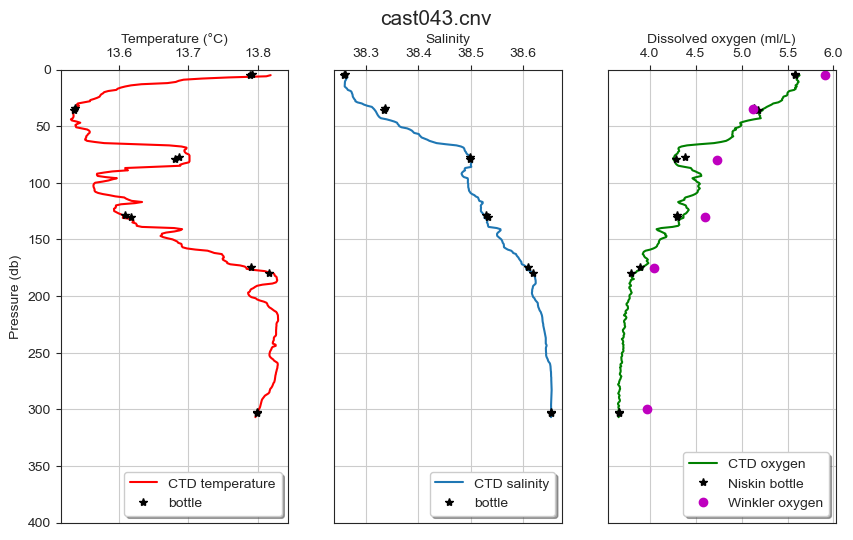

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6), dpi=100,  sharey=True)
plt.suptitle(profile.attrs['filename'], fontsize=15)

# Temperature
ax1.plot(temp,pres,'-r')
ax1.plot(tempbtl,presbtl,'*k')
ax1.set_ylabel('Pressure (db)')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlabel('Temperature (°C)')
ax1.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top') 
ax1.yaxis.set_ticks_position('left') 
ax1.set_ylim([ 400,0])
ax1.grid(True)
ax1.legend( ('CTD temperature', 'bottle'), loc='lower right', shadow=True)

# Salinity
ax2.plot(sal,pres,'-')
ax2.plot(salbtl,presbtl,'*k')
ax2.set_xlabel('Salinity')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.set_ylim([ 400,0])
ax2.grid(True)
ax2.legend( ('CTD salinity', 'bottle'), loc='lower right', shadow=True)

# dissoledOxygen
ax3.plot(oxy,pres,'-g')
ax3.plot(oxybtl,presbtl,'*k')
ax3.plot(oxywink,preswink,'om')

ax3.set_xlabel('Dissolved oxygen (ml/L)')
ax3.xaxis.set_label_position('top')
ax3.xaxis.set_ticks_position('top') 
ax3.set_ylim([ 400,0])
ax3.grid(True)
ax3.legend( ('CTD oxygen', 'Niskin bottle', 'Winkler oxygen'), loc='lower right', shadow=True)

FIG= profile.attrs['filename'][0:7]
plt.savefig(os.path.join(str(FIG))+'.png')